In [1]:
import os
import sys
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bibtexparser
from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import *

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
with open('retraction_records_01.bib') as retr_file:
    retr_recs = retr_file.read()
#end
retraction_db = bibtexparser.loads(retr_recs)

/usr/local/lib/python2.7/dist-packages/bibtexparser/bparser.py:106: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if bibtex_str[:3] == byte:


In [4]:
print retraction_db.entries[0]

{u'issn': u'1386-1425', u'month': u'JAN 15', u'affiliation': u'Ashokkumar, S (Reprint Author), Annamalai Univ, Dept Phys, Annamalainagar 608002, Tamil Nadu, India.\nAshokkumar, S.; Kathiravan, V., Annamalai Univ, Dept Phys, Annamalainagar 608002, Tamil Nadu, India.\nRavi, S.; Velmurugan, S., Annamalai Univ, Dept Engn Phys, Annamalainagar 608002, Tamil Nadu, India.', u'doc-delivery-number': u'DZ1MA', u'year': u'2017', 'ENTRYTYPE': u'article', u'web-of-science-categories': u'Spectroscopy', u'title': u'Synthesis of silver nanoparticles using A. indicum leaf extract and\ntheir antibacterial activity (Retraction of vol 134C, pg 34, 2014)', u'pages': u'526', u'unique-id': u'ISI:000385601300067', u'number-of-cited-references': u'1', u'journal': u'SPECTROCHIMICA ACTA PART A-MOLECULAR AND BIOMOLECULAR SPECTROSCOPY', u'volume': u'171', u'address': u'THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFORD OX5 1GB, ENGLAND', 'ID': 'ISI:000385601300067', u'times-cited': u'0', u'usage-count-since-2013': u'

In [5]:
for key, value in retraction_db.entries[0].items():
    print '---------------------------'
    print key + ':'
    print value
#end

---------------------------
issn:
1386-1425
---------------------------
month:
JAN 15
---------------------------
affiliation:
Ashokkumar, S (Reprint Author), Annamalai Univ, Dept Phys, Annamalainagar 608002, Tamil Nadu, India.
Ashokkumar, S.; Kathiravan, V., Annamalai Univ, Dept Phys, Annamalainagar 608002, Tamil Nadu, India.
Ravi, S.; Velmurugan, S., Annamalai Univ, Dept Engn Phys, Annamalainagar 608002, Tamil Nadu, India.
---------------------------
doc-delivery-number:
DZ1MA
---------------------------
year:
2017
---------------------------
ENTRYTYPE:
article
---------------------------
web-of-science-categories:
Spectroscopy
---------------------------
title:
Synthesis of silver nanoparticles using A. indicum leaf extract and
their antibacterial activity (Retraction of vol 134C, pg 34, 2014)
---------------------------
pages:
526
---------------------------
unique-id:
ISI:000385601300067
---------------------------
number-of-cited-references:
1
---------------------------
journal:

In [6]:
def customizations(record):
    """Use some functions delivered by the library

    :param record: a record
    :returns: -- customized record
    """
    record = type(record)
    record = author(record)
    record = editor(record)
    record = journal(record)
    record = keyword(record)
    record = link(record)
    record = page_double_hyphen(record)
    record = doi(record)
    return record
#end

In [7]:
n_files = 9
base_filename = 'retraction_records_'
retraction_ls = list()

parser = BibTexParser()
parser.customization = customizations
    
for ifile in range(1, n_files+1):
    filename = base_filename + str(ifile).zfill(2) + '.bib'
    with open(filename) as rec_file:
        recs_str = rec_file.read()
    #end
    retraction_ls.extend(bibtexparser.loads(recs_str, parser=parser).entries)
#end                

In [8]:
full_key_ls = list()

for rec in retraction_ls:
    full_key_ls.extend(rec.keys())
#end

full_key_ls = list(set(full_key_ls))

In [9]:
rec_dc = dict()
for key in full_key_ls:
    rec_dc[key] = list()
#end

In [10]:
for retraction_dc in retraction_ls:
    for key in rec_dc.keys():
        if key in retraction_dc.keys():
            rec_dc[key].append(retraction_dc[key])
        else:
            rec_dc[key].extend([None])
        #end
    #end
#end

In [11]:
retractions_df = pd.DataFrame(data=rec_dc)

In [12]:
retractions_df.head(2)

,ENTRYTYPE,ID,abstract,address,affiliation,article-number,author,author-email,booktitle,doc-delivery-number,...,series,times-cited,title,type,unique-id,usage-count-(last-180-days),usage-count-since-2013,volume,web-of-science-categories,year
0,article,ISI:000385601300067,None,"THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...","Ashokkumar, S (Reprint Author), Annamalai Univ...",None,"[Ashokkumar, S., Ravi, S., Kathiravan, V., Vel...",None,None,DZ1MA,...,None,0,Synthesis of silver nanoparticles using A. ind...,correction,ISI:000385601300067,3,3,171,Spectroscopy,2017
1,article,ISI:000385601300068,None,"THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...","Ashokkumar, S (Reprint Author), Annamalai Univ...",None,"[Ashokkumar, S., Ravi, S., Kathiravan, V., Vel...",None,None,DZ1MA,...,None,0,"Synthesis, characterization and catalytic acti...",correction,ISI:000385601300068,1,1,171,Spectroscopy,2017


In [13]:
retractions_df.drop('unique-id', axis=1, inplace=True)

In [14]:
retractions_df.columns

Index([                  u'ENTRYTYPE',                          u'ID',
                          u'abstract',                     u'address',
                       u'affiliation',              u'article-number',
                            u'author',                u'author-email',
                         u'booktitle',         u'doc-delivery-number',
                               u'doi',                      u'editor',
                             u'eissn',     u'funding-acknowledgement',
                      u'funding-text',                        u'isbn',
                              u'issn',                     u'journal',
                       u'journal-iso',                     u'keyword',
                     u'keywords-plus',                    u'language',
                              u'link',                       u'month',
                              u'note',                      u'number',
        u'number-of-cited-references',               u'orcid-numbers',
      

In [15]:
class AuthorsExtractor():
    '''
    '''
    
    def __init__(self):
        pass
    #end
    
    def get_first_author(self, author_ls):
        if isinstance(author_ls, list):
            return author_ls[0]
        else:
            return None
        #end
    #end
    
    def get_last_author(self, author_ls):
        if isinstance(author_ls, list):
            if len(author_ls)>1:
                return author_ls[-1]
            else:
                return None
            #end
        else:
            return None
        #end
    #end
    
    def get_second_author(self, author_ls):
        if isinstance(author_ls, list):
            if len(author_ls)>2:
                return author_ls[1]
            else:
                return None
            #end
        else:
            return None
        #end
    #end

    def get_middle_authors(self, author_ls):
        if isinstance(author_ls, list):
            if len(author_ls)>2:
                return author_ls[1:-1]
            else:
                return None
            #end
        else:
            return None
        #end
    #end
    
#end

class TitleExtractor():
    '''
    '''
    
    def __init__(self):
        pass
    #end
    
    def get_title(self, title):
        if title[:14]=='Retraction of ':
            title = title.replace('Retraction of ', '').replace('\n', ' ')
        elif title[:11]=='Retraction:':
            title = title.replace('Retraction: ', '').replace('\n', ' ')            
        else:
            title = title.replace('retraction', 'Retraction')
            title = title.split('Retraction ')[0].strip('()').replace('\n', ' ')
        return title
    #end
    
    def get_year_published(self, title):
        title = title.replace(' Statement of Retraction', '')
        try:
            year = int(title.replace(' )', ')').strip('()')[-4:])
        except:
            year = -9999
        #end
        return year
    #end
    
#end
        

In [16]:
def build_summary_df(df):
    '''
    '''
    to_copy_ls = ['ID', 'author', 'journal-iso', 'title', 'publisher', \
                  'times-cited', 'number-of-cited-references', 'usage-count-since-2013', \
                  'usage-count-(last-180-days)', 'web-of-science-categories']
    s_df = df[to_copy_ls].copy(deep=True)
    ae = AuthorsExtractor()
    s_df['first_author'] = s_df['author'].apply(lambda x: ae.get_first_author(x))
    s_df['last_author'] = s_df['author'].apply(lambda x: ae.get_last_author(x))
    s_df['second_author'] = s_df['author'].apply(lambda x: ae.get_second_author(x))
    s_df['middle_authors'] = s_df['author'].apply(lambda x: ae.get_middle_authors(x))
    s_df['month_retracted'] = df['month'].apply(lambda x: str(x)[0:4])
    s_df['year_retracted'] = df['year']
    s_df['title'] = df['title'].apply(lambda s: TitleExtractor().get_title(s))
    s_df['year_published'] = df['title'].apply(lambda s: TitleExtractor().get_year_published(s))
    s_df.drop('author', axis=1, inplace=True)
    s_df['retraction_count'] = 1
    int_ls = ['year_published', 'year_retracted', 'times-cited', 'number-of-cited-references', \
              'usage-count-since-2013', 'usage-count-(last-180-days)', 'retraction_count']
    str_ls =  [field for field in s_df.columns if field not in int_ls]
    s_df[int_ls] = s_df[int_ls].astype(int)
    s_df[str_ls] = s_df[str_ls].astype(str)
    return s_df
#end

In [17]:
summary_df = build_summary_df(retractions_df)

In [18]:
summary_df.head(1)

,ID,journal-iso,title,publisher,times-cited,number-of-cited-references,usage-count-since-2013,usage-count-(last-180-days),web-of-science-categories,first_author,last_author,second_author,middle_authors,month_retracted,year_retracted,year_published,retraction_count
0,ISI:000385601300067,Spectroc. Acta Pt. A-Molec. Biomolec. Spectr.,Synthesis of silver nanoparticles using A. ind...,PERGAMON-ELSEVIER SCIENCE LTD,0,1,3,3,Spectroscopy,"Ashokkumar, S.","Velmurugan, S.","Ravi, S.","[u'Ravi, S.', u'Kathiravan, V.']",JAN,2017,2014,1


In [19]:
summary_df.groupby(['first_author']).agg({'times-cited': sum, 'usage-count-since-2013': sum, 
                                          'retraction_count': 'count'}).sort_values(by='retraction_count', 
                                                                                    ascending=False).head(4)

,retraction_count,times-cited,usage-count-since-2013
first_author,,,
"{[}Anonymous],",154,0,522
"Fujii, Y.",46,1,251
"Fujii, Yoshitaka",36,0,151
"Schon, JH",32,38,866


In [20]:
summary_df.groupby(['second_author']).agg({'times-cited': sum, 'usage-count-since-2013': sum, 
                                           'retraction_count': 'count'}).sort_values(by='retraction_count', 
                                                                                     ascending=False).head(4)

,retraction_count,times-cited,usage-count-since-2013
second_author,,,
None,1504,531,10818
"Kloc, C",19,23,370
"Saitoh, Y.",14,1,78
"Uemura, A.",7,0,36


In [21]:
summary_df.groupby(['last_author']).agg({'times-cited': sum, 'usage-count-since-2013': sum, 
                                         'retraction_count': 'count'}).sort_values(by='retraction_count', 
                                                                                   ascending=False).head(4)

,retraction_count,times-cited,usage-count-since-2013
last_author,,,
None,871,268,5668
"Toyooka, H.",28,1,144
"Batlogg, B",21,27,443
"Kato, Shigeaki",16,7,114


In [22]:
journal_ls = ['Nature', 'Science', 'Cell']
summary_df[summary_df['journal-iso'].isin(journal_ls)].groupby(['journal-iso', 
                                                                'year_published']).agg({'retraction_count': 
                                                                                           'count'}).head(4)

retraction_count
journal-iso year_published                  
Cell        2000                           2
            2002                           2
            2003                           3
            2004                           1

In [23]:
summary_df.groupby(['year_published']).agg({'times-cited': sum, 'usage-count-since-2013': sum, 
                                            'retraction_count': 'count'}).sort_values(by='retraction_count', 
                                                                                      ascending=False).head(4)

,retraction_count,times-cited,usage-count-since-2013
year_published,,,
2012,384,39,3544
2010,373,90,3792
2014,346,23,2259
2009,344,136,3527


In [24]:
summary_df.groupby(['year_retracted']).agg({'times-cited': sum, 'usage-count-since-2013': sum, 
                                            'retraction_count': 'count'}).sort_values(by='retraction_count', 
                                                                                      ascending=False).head(4)

,retraction_count,times-cited,usage-count-since-2013
year_retracted,,,
2015,613,38,3678
2013,516,77,5778
2016,511,17,1572
2014,446,68,3813


In [25]:
def build_middle_authors_df(ret_df):
    '''
    '''
    auth_dc = dict()
    for iloc in range(len(ret_df)):
        if ret_df['middle_authors'].iloc[iloc]=='None':
            auth_ls = ['Nemo']
        else:
            auth_ls = ast.literal_eval(ret_df['middle_authors'].iloc[iloc])
        #end
        for auth in auth_ls:
            if auth in auth_dc.keys():
                auth_dc[auth] = auth_dc[auth] + 1
            else:
                auth_dc[auth] = 1
            #end
        #end
    #end
    middle_authors_dc = {'middle_author': auth_dc.keys(), 'retraction_count': auth_dc.values()}
    middle_authors_df = pd.DataFrame(data=middle_authors_dc)
    return middle_authors_df.sort_values(by='retraction_count', ascending=False).reset_index(drop=True)
#end
        

In [26]:
middle_authors_df = build_middle_authors_df(summary_df)

In [27]:
middle_authors_df.head(4)

,middle_author,retraction_count
0,Nemo,1504
1,"Kloc, C",21
2,"Tanaka, H.",20
3,"Saitoh, Y.",14


In [28]:
def n_authors_dist_df(ret_df):
    '''
    '''
    n_auth_dc = dict()
    for iloc in range(len(ret_df)):
        n_auth = 1
        if ret_df['last_author'].iloc[iloc]!='None':
            n_auth = n_auth + 1
        #end
        if ret_df['middle_authors'].iloc[iloc]!='None':
            n_auth = n_auth + len(ast.literal_eval(ret_df['middle_authors'].iloc[iloc]))
        #end
        if ret_df['first_author'].iloc[iloc]=='{[}Anonymous], ':
            n_auth = 0
        #end
        if str(n_auth) in n_auth_dc.keys():
            n_auth_dc[str(n_auth)] = n_auth_dc[str(n_auth)] + 1
        else:
            n_auth_dc[str(n_auth)] = 1
        #end
    #end
    n_auth_dist_df = pd.DataFrame(data={'n_authors': n_auth_dc.keys(), 'n_retractions': n_auth_dc.values()})
    n_auth_dist_df['n_authors'] = n_auth_dist_df['n_authors'].astype(int)
    n_auth_dist_df['n_rel_retractions'] = 1.0*n_auth_dist_df['n_retractions']/n_auth_dist_df['n_retractions'].sum()
    return n_auth_dist_df.sort_values(by='n_authors').reset_index(drop=True)
#end

In [29]:
n_auth_dist_df = n_authors_dist_df(summary_df)

In [30]:
n_auth_dist_df.sort_values(by='n_authors').head(8)

,n_authors,n_retractions,n_rel_retractions
0,0,154,0.035273
1,1,717,0.164224
2,2,633,0.144984
3,3,657,0.150481
4,4,581,0.133074
5,5,425,0.097343
6,6,359,0.082226
7,7,250,0.057261


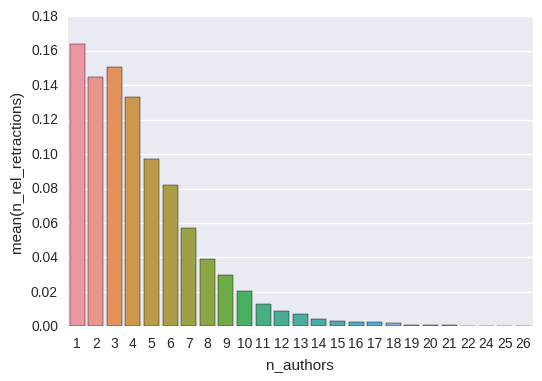

In [31]:
sns.barplot(x="n_authors", y="n_rel_retractions", data=n_auth_dist_df[n_auth_dist_df['n_authors']!=0]);

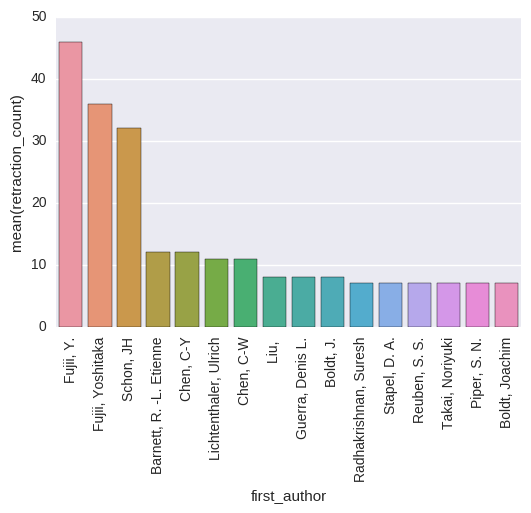

In [32]:
first_auth_df = summary_df.groupby(['first_author']).agg({'times-cited': sum, 
                                                          'usage-count-since-2013': sum, 
                                                          'retraction_count': 'count'}
                                                         ).sort_values(by='retraction_count', 
                                                                      ascending=False).reset_index()
first_auth_df = first_auth_df[first_auth_df['first_author']!='{[}Anonymous], ']
sns.barplot(x='first_author', y="retraction_count", data=first_auth_df.head(16));
plt.xticks(rotation=90);

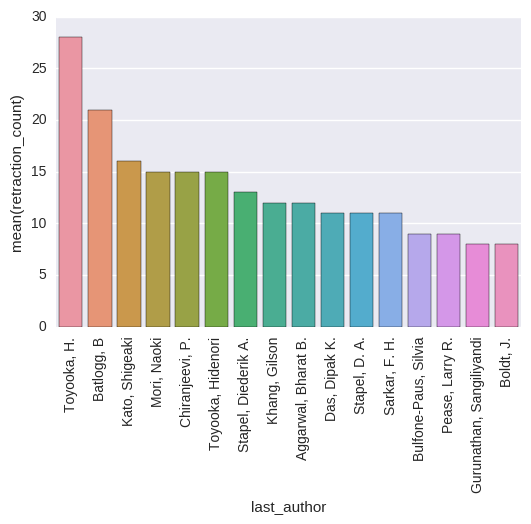

In [33]:
last_auth_df = summary_df.groupby(['last_author']).agg({'times-cited': sum, 
                                                        'usage-count-since-2013': sum, 
                                                        'retraction_count': 'count'}
                                                       ).sort_values(by='retraction_count', 
                                                                     ascending=False).reset_index()
last_auth_df = last_auth_df[last_auth_df['last_author']!='None']
sns.barplot(x='last_author', y='retraction_count', data=last_auth_df.head(16));
plt.xticks(rotation=90);

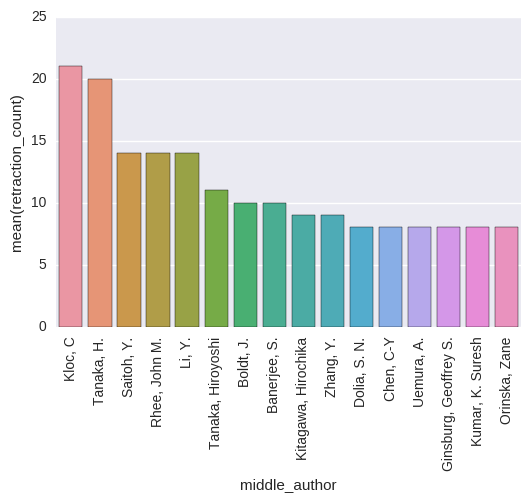

In [34]:
sns.barplot(x="middle_author", y="retraction_count", 
            data=middle_authors_df[middle_authors_df['middle_author']!='Nemo'].head(16));
plt.xticks(rotation=90);

In [35]:
summary_df.columns

Index([                         u'ID',                 u'journal-iso',
                             u'title',                   u'publisher',
                       u'times-cited',  u'number-of-cited-references',
            u'usage-count-since-2013', u'usage-count-(last-180-days)',
         u'web-of-science-categories',                u'first_author',
                       u'last_author',               u'second_author',
                    u'middle_authors',             u'month_retracted',
                    u'year_retracted',              u'year_published',
                  u'retraction_count'],
      dtype='object')

In [36]:
first_auth_set = list(set(list(summary_df['first_author'])))
last_auth_set = list(set(list(summary_df['last_author'])))
def flatten_list(nest_ls):
    flat_list = []
    for el in nest_ls:
        if el is None or el=='Nemo':
            pass
        elif isinstance(el, list):
            flat_list.extend(flatten_list(el))
        else:
            flat_list.append(el)
        #end
    #end
    return flat_list
#end
middle_auth_set = list(set(flatten_list(summary_df['middle_authors'].apply(lambda x: ast.literal_eval(x)))))

In [37]:
def list_of_el_in_two_lists(list1, list2):
    el_in_2_ls = []
    for el in list1:
        if el in list2:
            el_in_2_ls.append(el)
        #end
    #end
    return el_in_2_ls
#end

In [38]:
first_or_last_ls = list_of_el_in_two_lists(first_auth_set, last_auth_set)
fist_or_middle_ls = list_of_el_in_two_lists(first_auth_set, middle_auth_set)
last_or_middle_ls = list_of_el_in_two_lists(last_auth_set, middle_auth_set)
all_positions_ls = list_of_el_in_two_lists(first_or_last_ls, middle_auth_set)
some_multiple_ls = list(set(first_or_last_ls + fist_or_middle_ls + last_or_middle_ls))
all_authors_ls = list(set(first_auth_set + middle_auth_set + last_auth_set))

In [39]:
field_ls = ['ID', 'journal-iso', 'title', 'web-of-science-categories', 'first_author', 'last_author', 'middle_authors']
unpacked_df = summary_df[field_ls]
unpacked_df['middle_authors'] = unpacked_df['middle_authors'].apply(lambda x: ast.literal_eval(x) if x!='None' else list())

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [40]:
unpacked_summary_df = pd.concat([pd.DataFrame(dict(zip(unpacked_df.columns, 
                                                       unpacked_df.ix[i]))) for i in range(len(unpacked_df))])

In [41]:
author_summary_dc = {'author_name': [], 'title': [], 'ID': [], 'wos_categories': [], 'first_author': [], 
                     'last_author': [], 'middle_author': []}
for author in all_authors_ls:
    first_author_article_id_ls = list(summary_df['ID'][summary_df['first_author']==author])
    if len(first_author_article_id_ls)>0:
        for article_id in first_author_article_id_ls:
            author_summary_dc['ID'].append(article_id)
            author_summary_dc['author_name'].append(author)
            author_summary_dc['first_author'].append(1)
            author_summary_dc['last_author'].append(0)
            author_summary_dc['middle_author'].append(0)
            author_summary_dc['title'].append(summary_df['title'][summary_df['ID']==article_id])
            author_summary_dc['wos_categories'].append(summary_df['web-of-science-categories'][summary_df['ID']==article_id])
        #end
    #end
    last_author_article_id_ls = list(summary_df['ID'][summary_df['last_author']==author])
    if len(last_author_article_id_ls)>0:
        for article_id in last_author_article_id_ls:
            author_summary_dc['ID'].append(article_id)
            author_summary_dc['author_name'].append(author)
            author_summary_dc['first_author'].append(0)
            author_summary_dc['last_author'].append(1)
            author_summary_dc['middle_author'].append(0)
            author_summary_dc['title'].append(summary_df['title'][summary_df['ID']==article_id])
            author_summary_dc['wos_categories'].append(summary_df['web-of-science-categories']\
                                                       [summary_df['ID']==article_id])
        #end
    #end
    middle_author_article_id_ls = list(unpacked_summary_df['ID'][unpacked_summary_df['middle_authors']==author])
    if len(middle_author_article_id_ls)>0:
        for article_id in middle_author_article_id_ls:
            author_summary_dc['ID'].append(article_id)
            author_summary_dc['author_name'].append(author)
            author_summary_dc['first_author'].append(0)
            author_summary_dc['last_author'].append(0)
            author_summary_dc['middle_author'].append(1)
            author_summary_dc['title'].append(unpacked_summary_df['title'][unpacked_summary_df['ID']==article_id])
            author_summary_dc['wos_categories'].append(unpacked_summary_df['web-of-science-categories']\
                                                       [unpacked_summary_df['ID']==article_id])
        #end
    #end
#end
            
author_summary_df = pd.DataFrame(data=author_summary_dc)

In [42]:
author_summary_df.head(3)

,ID,author_name,first_author,last_author,middle_author,title,wos_categories
0,ISI:000315707300037,"Bose, Julie S.",1,0,0,1989 A Dihydrobenzofuran Lignan Induces Cel...,"1989 Chemistry, Medicinal Name: web-of-scie..."
1,ISI:000239914800070,"Rockley, M. G.",0,0,1,0 Theoretical investigation of the dissocia...,"0 Chemistry, Physical; Physics, Atomic, Mol..."
2,ISI:000180655500059,"Onoda, N",0,0,1,0 A novel bone marrow stroma-derived growth...,0 Immunology 1 Immunology 2 Immunolog...


In [43]:
auth_df = author_summary_df.groupby(['author_name']).agg({'first_author': sum, 
                                                          'last_author': sum, 
                                                          'middle_author': sum}
                                                         ).sort_values(by='first_author', 
                                                                       ascending=False).reset_index()

auth_df['count'] = auth_df['first_author'] + auth_df['last_author'] + auth_df['middle_author']
auth_df = auth_df[auth_df['author_name']!='{[}Anonymous], '][auth_df['author_name']!='None']
auth_df = auth_df.sort_values(by='count', ascending=False).reset_index(drop=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [44]:
auth_df['first_and_last_author'] = auth_df['first_author'] + auth_df['last_author']

In [45]:
same_author_dc = {'Fujii, Yoshitaka': 'Fujii, Y.',
                  'Toyooka, Hidenori': 'Toyooka, H.',
                  'Tanaka, Hiroyoshi': 'Tanaka, H.',
                  'Saitoh, Yuhji': 'Saitoh, Y.',
                  'Stapel, Diederik A.': 'Stapel, D. A.',
                  'Stapel, D.': 'Stapel, D. A.',
                  'Mori, Naoki': 'Mori, N.',
                  'Kato, Shigeaki': 'Kato, S.',
                  'Aggarwal, Bharat B.': 'Aggarwal, B. B.',
                  'Boldt, Joachim': 'Boldt, J.',
                  'Hunton, James E.': 'Hunton, J. E.',
                  'Tomita, Mariko': 'Tomita, M.',
                  'Potti, Anil': 'Potti, A.'
                  }
adj_auth_df = auth_df.copy(deep=True)
for old_name, new_name in zip(same_author_dc.keys(), same_author_dc.values()):
    adj_auth_df['first_author'][auth_df['author_name']==new_name] = int(adj_auth_df['first_author'][auth_df['author_name']==new_name]) + \
                                                                    int(adj_auth_df['first_author'][auth_df['author_name']==old_name])
    adj_auth_df['last_author'][auth_df['author_name']==new_name] = int(adj_auth_df['last_author'][auth_df['author_name']==new_name]) + \
                                                                   int(adj_auth_df['last_author'][auth_df['author_name']==old_name])
    adj_auth_df['middle_author'][auth_df['author_name']==new_name] = int(adj_auth_df['middle_author'][auth_df['author_name']==new_name]) + \
                                                                     int(adj_auth_df['middle_author'][auth_df['author_name']==old_name])
    adj_auth_df['count'][auth_df['author_name']==new_name] = int(adj_auth_df['count'][auth_df['author_name']==new_name]) + \
                                                             int(adj_auth_df['count'][auth_df['author_name']==old_name])
    adj_auth_df['first_and_last_author'][auth_df['author_name']==new_name] = int(adj_auth_df['first_and_last_author'][auth_df['author_name']==new_name]) + \
                                                                             int(adj_auth_df['first_and_last_author'][auth_df['author_name']==old_name])
    adj_auth_df = adj_auth_df[auth_df['author_name']!=old_name]
#end
rename_author_dc = {'Khang, Gilson': 'Khang, G.',
                    'Zaman, Khalid': 'Zaman, K.',
                    'Rhee, John M.': 'Rhee, J. M.',
                    'Kitagawa, Hirochika': 'Kitagawa, H.',
                    'Lichtenthaler, Ulrich': 'Lichtenthaler, U.',
                    'Pease, Larry R.': 'Pease, L. R.',
                    }
for old_name, new_name in zip(rename_author_dc.keys(), rename_author_dc.values()):
    adj_auth_df['author_name'][auth_df['author_name']==old_name] = new_name
#end
adj_auth_df = adj_auth_df.sort_values(by='count', ascending=False).reset_index(drop=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [49]:
len(adj_auth_df[adj_auth_df['count']>1])

1736

In [46]:
adj_auth_df.head(8)

,author_name,first_author,last_author,middle_author,count,first_and_last_author
0,"Fujii, Y.",82,3,5,90,85
1,"Toyooka, H.",0,43,10,53,43
2,"Stapel, D. A.",14,25,8,47,39
3,"Boldt, J.",15,11,13,39,26
4,"Tanaka, H.",0,8,31,39,8
5,"Schon, JH",32,0,1,33,32
6,"Mori, N.",5,23,2,30,28
7,"Chen, C-Y",12,6,8,26,18


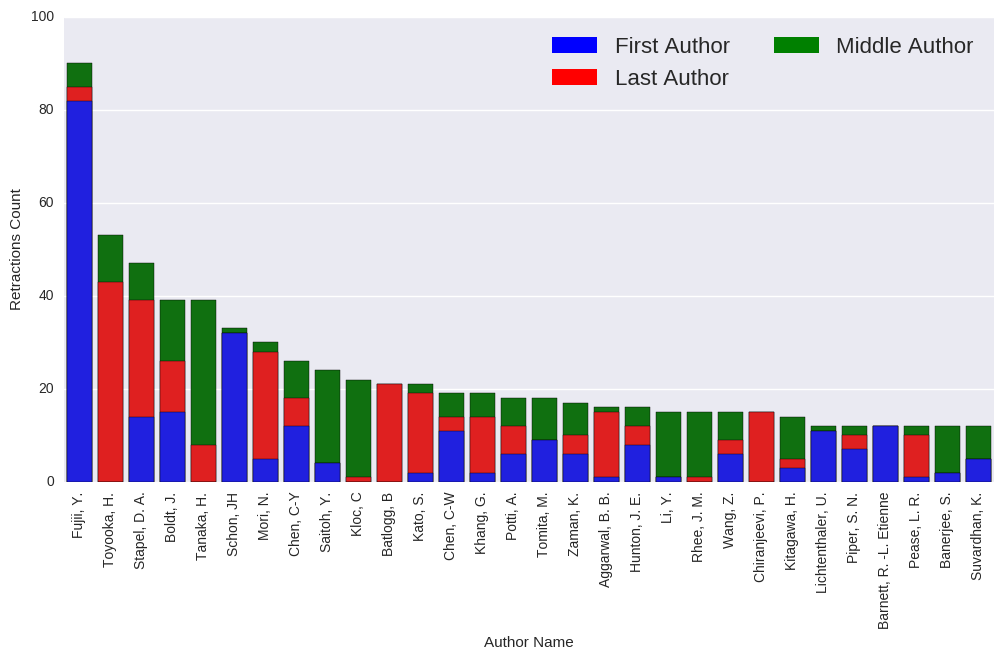

In [47]:
plt.figure(figsize=(12,6))
middle_author_bar = sns.barplot(x='author_name', y='count', data=adj_auth_df.head(30), color='green');
last_author_bar = sns.barplot(x='author_name', y='first_and_last_author', data=adj_auth_df.head(30), color='red');
first_author_bar = sns.barplot(x='author_name', y='first_author', data=adj_auth_df.head(30), color='blue');
first_auth = plt.Rectangle((0,0),1,1,fc='blue', edgecolor = 'none')
last_auth = plt.Rectangle((0,0),1,1,fc='red', edgecolor = 'none')
middle_auth = plt.Rectangle((0,0),1,1,fc='green', edgecolor = 'none')
l = plt.legend([first_auth, last_auth, middle_auth], ['First Author', 'Last Author', 'Middle Author'], 
               loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
plt.ylim([0,100])
plt.xlabel('Author Name')
plt.ylabel('Retractions Count')
plt.xticks(rotation=90);

In [108]:
summary_df[summary_df['first_author'].str.contains('Pease')]

,ID,journal-iso,title,publisher,times-cited,number-of-cited-references,usage-count-since-2013,usage-count-(last-180-days),web-of-science-categories,first_author,last_author,second_author,middle_authors,month_retracted,year_retracted,year_published,retraction_count
3042,ISI:000278200000046,Faseb J.,Induction of a gene expression program in dend...,FEDERATION AMER SOC EXP BIOL,0,17,8,2,Biochemistry \& Molecular Biology; Biology; Ce...,"Pease, Larry R.",None,None,None,JUN,2010,2006,1


In [116]:
summary_df['title'][summary_df['first_author'].str.contains('Fujii')][summary_df['title'].str.contains('Prevention')]

1825    Prevention of PONV with granisetron, droperido...
1827    Prevention of PONV with granisetron, droperido...
1831    Prevention of postoperative nausea and vomitin...
1867    Prevention of post-operative nausea and vomiti...
1931    Prevention of postoperative vomiting with gran...
2068    Prevention of nausea and vomiting during termi...
2110    Prevention of postoperative nausea and vomitin...
Name: title, dtype: object

In [118]:
summary_df['title'].iloc[1827]

'Prevention of PONV with granisetron, droperidol and metoclopramide in female patients with history of motion sickness '